In [1]:
import matplotlib.pyplot as plt
import math
from tqdm import tqdm_notebook
import scipy.io.wavfile as wav
import numpy as np
import theano.tensor as T
import pandas as pd
import theano
from tools.tools import normalize, get_energy, magnitude, zcr
%matplotlib inline

In [2]:
data = pd.DataFrame.from_csv("pronuns.csv")
data.pronun_id[1000]

'585fda11698f828c848d8a25'

In [3]:
# Загружаем звук
sampling_rate, sample =  wav.read("audio/22.mp3.wav")#"mongodb/sounds/%s.wav" % data.pronun_id[600])

if len(sample.shape) > 1:
    sample = [i[0] for i in sample]
# Длинна окна
sample_count = len(sample)

# Size of window 30ms
window_size_30 = int(30 * (sampling_rate/1000))

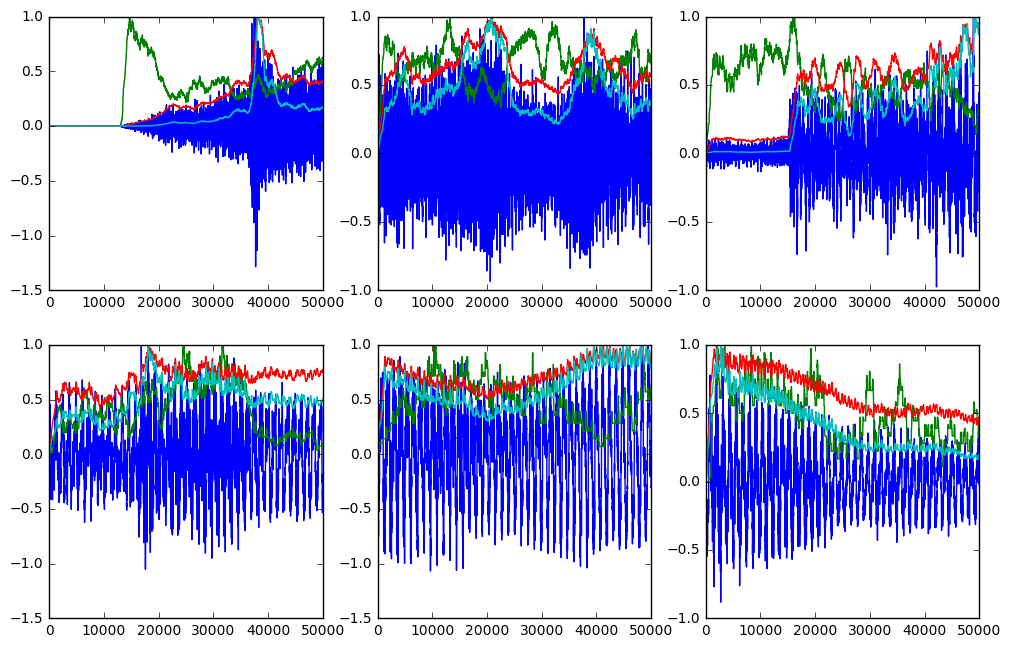

In [4]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
voice = plt.plot(normalize(sample[:50000]))
zcr_line = plt.plot(normalize(zcr(sample[:50000], window_size_30)))
magnitude_line = plt.plot(normalize(magnitude(sample[:50000], window_size_30)))
energy_line = plt.plot(normalize(get_energy(sample[:50000], window_size_30)))

plt.subplot(3, 3, 2)
voice = plt.plot(normalize(sample[50000:100000]))
zcr_line = plt.plot(normalize(zcr(sample[50000:100000], window_size_30)))
magnitude_line = plt.plot(normalize(magnitude(sample[50000:100000], window_size_30)))
energy_line = plt.plot(normalize(get_energy(sample[50000:100000], window_size_30)))

plt.subplot(3, 3, 3)
voice = plt.plot(normalize(sample[100000:150000]))
zcr_line = plt.plot(normalize(zcr(sample[100000:150000], window_size_30)))
magnitude_line = plt.plot(normalize(magnitude(sample[100000:150000], window_size_30)))
energy_line = plt.plot(normalize(get_energy(sample[100000:150000], window_size_30)))


plt.subplot(3, 3, 4)
voice = plt.plot(normalize(sample[150000:200000]))
zcr_line = plt.plot(normalize(zcr(sample[150000:200000], window_size_30)))
magnitude_line = plt.plot(normalize(magnitude(sample[150000:200000], window_size_30)))
energy_line = plt.plot(normalize(get_energy(sample[150000:200000], window_size_30)))


plt.subplot(3, 3, 5)
voice = plt.plot(normalize(sample[200000:250000]))
zcr_line = plt.plot(normalize(zcr(sample[200000:250000], window_size_30)))
magnitude_line = plt.plot(normalize(magnitude(sample[200000:250000], window_size_30)))
energy_line = plt.plot(normalize(get_energy(sample[200000:250000], window_size_30)))



plt.subplot(3, 3, 6)
voice = plt.plot(normalize(sample[250000:300000]))
zcr_line = plt.plot(normalize(zcr(sample[250000:300000], window_size_30)))
magnitude_line = plt.plot(normalize(magnitude(sample[250000:300000], window_size_30)))
energy_line = plt.plot(normalize(get_energy(sample[250000:300000], window_size_30)))

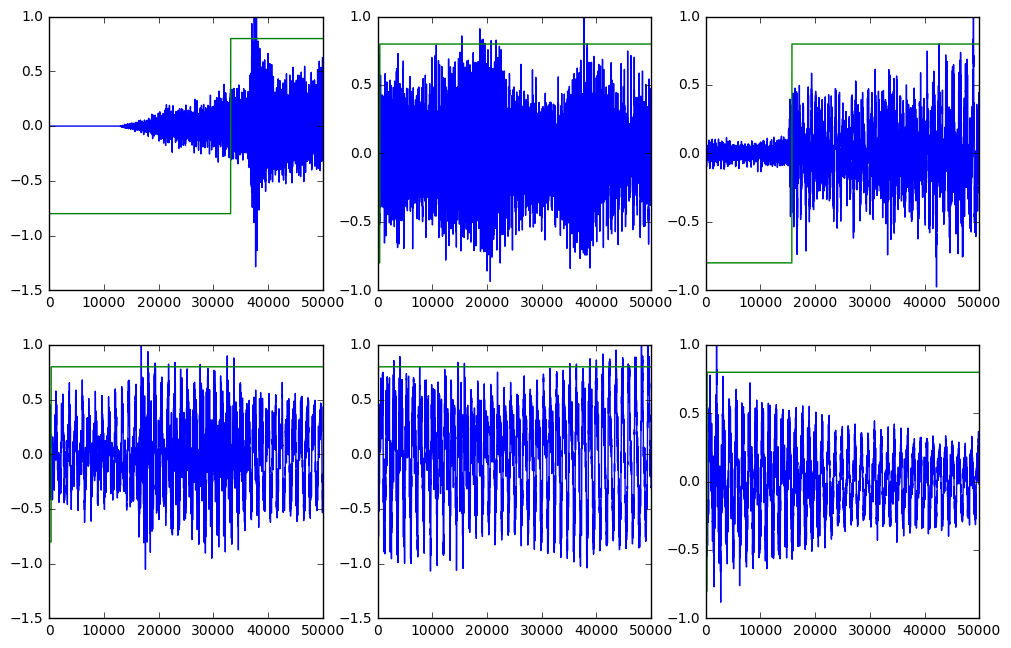

In [5]:

plt.figure(figsize=(12, 12))

answer1 = [0.8 if i >  0.1 else -0.8 for i in normalize(get_energy(sample[:50000], window_size_30))]
answer2 = [0.8 if i >  0.1 else -0.8 for i in normalize(get_energy(sample[50000:100000], window_size_30))]
answer3 = [0.8 if i >  0.1 else -0.8 for i in normalize(get_energy(sample[100000:150000], window_size_30))]
answer4 = [0.8 if i >  0.1 else -0.8 for i in normalize(get_energy(sample[150000:200000], window_size_30))]
answer5 = [0.8 if i >  0.1 else -0.8 for i in normalize(get_energy(sample[200000:250000], window_size_30))]
answer6 = [0.8 if i >  0.1 else -0.8 for i in normalize(get_energy(sample[250000:300000], window_size_30))]

plt.subplot(3, 3, 1)
plt.plot(normalize(sample[:50000]))
plt.plot(answer1)

plt.subplot(3, 3, 2)
plt.plot(normalize(sample[50000:100000]))
plt.plot(answer2)

plt.subplot(3, 3, 3)
plt.plot(normalize(sample[100000:150000]))
plt.plot(answer3)

plt.subplot(3, 3, 4)
plt.plot(normalize(sample[150000:200000]))
plt.plot(answer4)

plt.subplot(3, 3, 5)
plt.plot(normalize(sample[200000:250000]))
plt.plot(answer5)

plt.subplot(3, 3, 6)
plt.plot(normalize(sample[250000:300000]))
plt.plot(answer6)

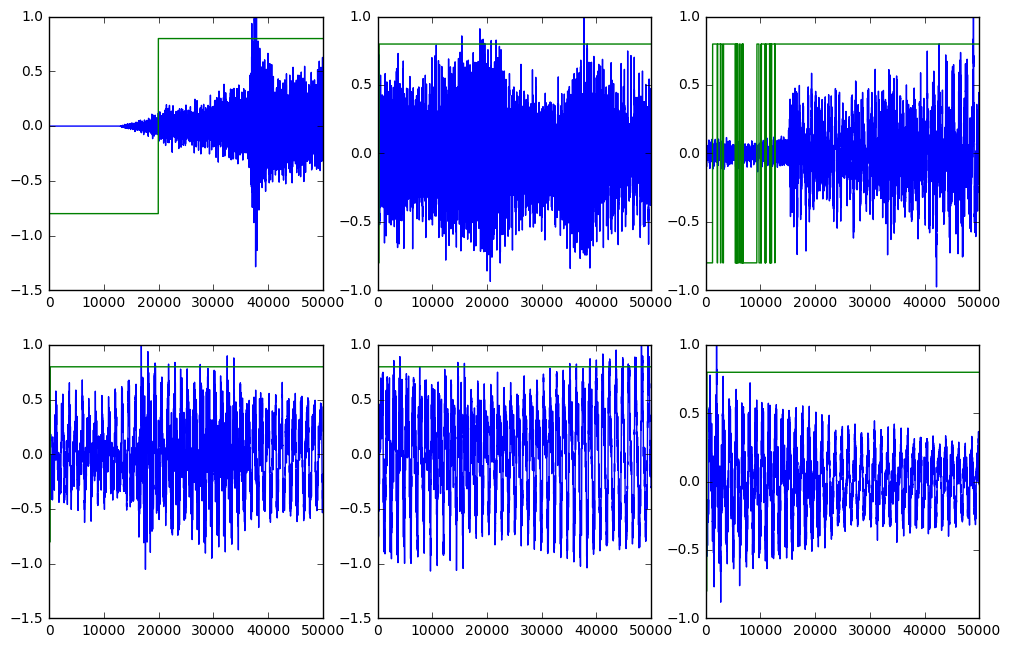

In [6]:

plt.figure(figsize=(12, 12))

answer1 = [0.8 if i >  0.1 else -0.8 for i in normalize(magnitude(sample[:50000], window_size_30))]
answer2 = [0.8 if i >  0.1 else -0.8 for i in normalize(magnitude(sample[50000:100000], window_size_30))]
answer3 = [0.8 if i >  0.1 else -0.8 for i in normalize(magnitude(sample[100000:150000], window_size_30))]
answer4 = [0.8 if i >  0.1 else -0.8 for i in normalize(magnitude(sample[150000:200000], window_size_30))]
answer5 = [0.8 if i >  0.1 else -0.8 for i in normalize(magnitude(sample[200000:250000], window_size_30))]
answer6 = [0.8 if i >  0.1 else -0.8 for i in normalize(magnitude(sample[250000:300000], window_size_30))]

plt.subplot(3, 3, 1)
plt.plot(normalize(sample[:50000]))
plt.plot(answer1)

plt.subplot(3, 3, 2)
plt.plot(normalize(sample[50000:100000]))
plt.plot(answer2)

plt.subplot(3, 3, 3)
plt.plot(normalize(sample[100000:150000]))
plt.plot(answer3)

plt.subplot(3, 3, 4)
plt.plot(normalize(sample[150000:200000]))
plt.plot(answer4)

plt.subplot(3, 3, 5)
plt.plot(normalize(sample[200000:250000]))
plt.plot(answer5)

plt.subplot(3, 3, 6)
plt.plot(normalize(sample[250000:300000]))
plt.plot(answer6)

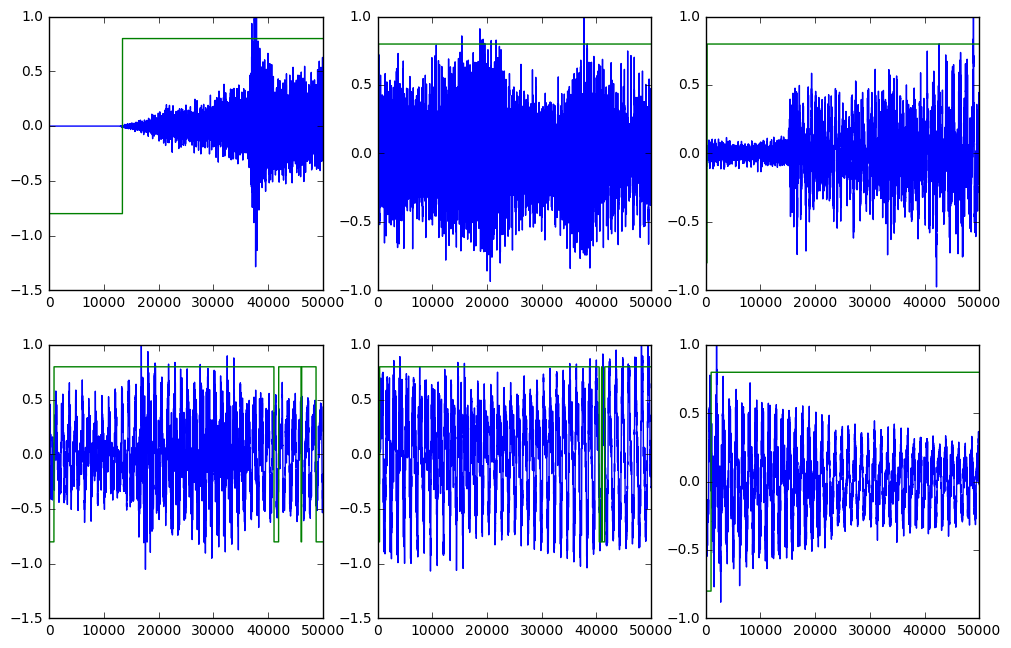

In [7]:

plt.figure(figsize=(12, 12))

answer1 = [0.8 if i >  0.1 else -0.8 for i in normalize(zcr(sample[:50000], window_size_30))]
answer2 = [0.8 if i >  0.1 else -0.8 for i in normalize(zcr(sample[50000:100000], window_size_30))]
answer3 = [0.8 if i >  0.1 else -0.8 for i in normalize(zcr(sample[100000:150000], window_size_30))]
answer4 = [0.8 if i >  0.1 else -0.8 for i in normalize(zcr(sample[150000:200000], window_size_30))]
answer5 = [0.8 if i >  0.1 else -0.8 for i in normalize(zcr(sample[200000:250000], window_size_30))]
answer6 = [0.8 if i >  0.1 else -0.8 for i in normalize(zcr(sample[250000:300000], window_size_30))]

plt.subplot(3, 3, 1)
plt.plot(normalize(sample[:50000]))
plt.plot(answer1)

plt.subplot(3, 3, 2)
plt.plot(normalize(sample[50000:100000]))
plt.plot(answer2)

plt.subplot(3, 3, 3)
plt.plot(normalize(sample[100000:150000]))
plt.plot(answer3)

plt.subplot(3, 3, 4)
plt.plot(normalize(sample[150000:200000]))
plt.plot(answer4)

plt.subplot(3, 3, 5)
plt.plot(normalize(sample[200000:250000]))
plt.plot(answer5)

plt.subplot(3, 3, 6)
plt.plot(normalize(sample[250000:300000]))
plt.plot(answer6)